In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import axes3d
import sklearn.datasets as dt
from sklearn.neighbors import KernelDensity
import pandas as pd
import seaborn as sns
from IPython.display import clear_output

sns.set()

In [31]:
datos = pd.read_csv('D:\emissionsmap\documentation\data\energyco2.csv', sep=',', low_memory=False, encoding='utf-8')

In [36]:
datosN = pd.read_csv('D:\emissionsmap\documentation\TablasNormal\Energyco2_Normalizado.csv', sep=',', low_memory=False, encoding='utf-8')

In [4]:
datos.columns

Index(['Unnamed: 0', 'Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission'],
      dtype='object')

In [47]:
datosN

,País,Combustible,Año,Consumo De Energía,Producción De Energía,Pib,Población,Intensidad_Energética_Per_Capita,Intensidad_Energética_Por_Pib,Emisión De Co2,Consumo De Energía TWh,Producción De Energía TWh,Intensidad_Energética_Per_Capita TWh,Intensidad_Energética_Por_Pib TWh,Id_Año,Id_País,Id_Combustible
0,World,all energy types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130,8.584402e-11,8.685147e-11,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,cc8cc099b05d2c44e441a5443da94571
1,World,Coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188,2.305279e-11,2.348013e-11,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,ff8cfc4e6a79e6514be2533a5f5506ad
2,World,natural gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377,1.578699e-11,1.604954e-11,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,400a8f6716375443c853ae0dfd78b768
3,World,Other,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565,3.870575e-11,3.901263e-11,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,6311ae17c1ee52b36e68aaf4ad066387
4,World,Nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000,2.220311e-12,2.220311e-12,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,c49e6d739a7a7356e88aa84503666ee9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51609,Zimbabwe,Coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869,1.320741e-14,2.226347e-14,3.373007e-12,1.313881e-12,ea6b2efbdd4255a9f1b3bbc6399b58f4,9d5116a2451bc98c2b46b93acbc1b4f0,ff8cfc4e6a79e6514be2533a5f5506ad
51610,Zimbabwe,natural gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000,0.000000e+00,0.000000e+00,3.373007e-12,1.313881e-12,ea6b2efbdd4255a9f1b3bbc6399b58f4,9d5116a2451bc98c2b46b93acbc1b4f0,400a8f6716375443c853ae0dfd78b768
51611,Zimbabwe,Other,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890,1.626551e-14,0.000000e+00,3.373007e-12,1.313881e-12,ea6b2efbdd4255a9f1b3bbc6399b58f4,9d5116a2451bc98c2b46b93acbc1b4f0,6311ae17c1ee52b36e68aaf4ad066387
51612,Zimbabwe,Nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000,NaN,NaN,3.373007e-12,1.313881e-12,ea6b2efbdd4255a9f1b3bbc6399b58f4,9d5116a2451bc98c2b46b93acbc1b4f0,c49e6d739a7a7356e88aa84503666ee9


In [51]:
datosWorldN = datosN[(datosN['Combustible'] == 'all energy types') & (datosN['País'] != 'World')]

In [5]:
datosWorld = datos[(datos['Energy_type'] == 'all_energy_types') & (datos['Country'] != 'World')]

In [6]:
datosCountry = datos[(datos['Energy_type'] == 'all_energy_types') & (datos['Country'] == 'World')]

In [30]:
datosWorld.isna().sum()

Unnamed: 0                        0
Country                           0
Energy_type                       0
Year                              0
Energy_consumption              647
Energy_production               647
GDP                            2569
Population                     1571
Energy_intensity_per_capita     847
Energy_intensity_by_GDP         847
CO2_emission                    869
dtype: int64

In [13]:
datosCountry.isna().sum() 

Unnamed: 0                     0
Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
dtype: int64

In [5]:
def detectar_outliers(df:pd.DataFrame,columna:str,name:str,tecnica='cajas') -> pd.DataFrame:

    #Detección por medio de Diagrama de Cajas:
    if tecnica == 'cajas':
        q1 = df[columna].describe().loc['25%']
        q3 = df[columna].describe().loc['75%']
        rango_IC = q3 - q1
        minimo = q1 - ((1.5) * (rango_IC))
        maximo = q3 + ((1.5) * (rango_IC))


    #Detección de outliers por medio de las 3 sigmas:
    elif tecnica == 'sigmas':
        promedio = df[columna].mean()
        stddev = df[columna].std()
        maximo = promedio + (3 * stddev)
        minimo = promedio - (3 * stddev)
    #df[name] = 1
    df.insert(1, "Outlier_CO2_emission", 1, allow_duplicates=False)

    df[name][(df[columna] > maximo) | (df[columna] < minimo)] = 0
    
    return df

In [ ]:
datosWorld.drop(columns={'Unnamed: 0'}, inplace=True)
datosCountry.drop(columns={'Unnamed: 0'}, inplace=True)

In [71]:
def quantiles (df, nomId, s):
     
    lista_id = []
    lista_minimo= []
    lista_maximo= []
   
    uni = df[nomId].unique()
    for id in uni:
        
        q1 = df[df[nomId] == id][s].quantile(0.25)
        mediana = df[df[nomId] == id][s].quantile(0.5)
        q3 = df[df[nomId] == id][s].quantile(0.75)
        
        iqr = q3 - q1
        minimo = mediana - 1.5 * iqr
        maximo = mediana + 1.5 * iqr    
        if (minimo< 0.001):
            minimo= 0.001
        
        lista_id.append(id)
        lista_minimo.append(minimo)
        lista_maximo.append(maximo)
        
        lst = list(zip(lista_id, lista_minimo, lista_maximo))
        df = pd.DataFrame(lst , columns = [nomId,'minimo','maximo'])
        
    return df

In [72]:
dfn = quantiles(datosWorldN, 'País', 'Emisión De Co2')

Completado: 0.43%


KeyError: 'Emisión De Co2'

In [27]:
df = quantiles(datosWorld, 'Country', 'CO2_emission')

Completado: 0.43%


KeyError: 'CO2_emission'

In [24]:
datosWorld

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
6,Afghanistan,all_energy_types,1980,0.026583,0.072561,NaN,13356.500,1.990283,0.000000,NaN
12,Albania,all_energy_types,1980,0.162982,0.155562,NaN,2682.700,60.752906,0.000000,NaN
18,Algeria,all_energy_types,1980,0.780695,2.803017,NaN,19221.700,40.615303,0.000000,NaN
24,American Samoa,all_energy_types,1980,0.005893,0.000000,NaN,32.646,180.515604,0.000000,NaN
30,Angola,all_energy_types,1980,0.058366,0.335098,NaN,8341.290,6.997257,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
55410,Wake Island,all_energy_types,2019,0.019436,0.000000,NaN,NaN,0.000000,0.000000,1.273787
55416,Western Sahara,all_energy_types,2019,0.003712,0.000000,NaN,NaN,0.000000,0.000000,0.263038
55422,Yemen,all_energy_types,2019,0.159020,0.133273,53.0838,29162.200,5.452938,2.995635,8.292505
55428,Zambia,all_energy_types,2019,0.207097,0.148004,247.1819,17873.850,11.586567,0.837831,7.096290


In [202]:
def evaluacion_calidad_outliers(dato, desde, hasta):
    calidad = 'Sin errores'
    if (str(dato) == 'nan'):
        calidad = 'Valor Nulo'
        return calidad
    if ((dato < desde) or (dato > hasta)):
        calidad = 'Outlier'
        return calidad
    return calidad

In [203]:
datosWorld = pd.merge(datosWorld, df, on='Country', how='left')

In [205]:
datosWorld['Calidad_co2'] = datosWorld.apply(lambda row: evaluacion_calidad_outliers(row['CO2_emission'], row['minimo'], row['maximo']), axis=1)

In [206]:
def ploteo_Calidad(df, columna, ubicacion):
    """
    Esta función recibe de parámetros un objeto dataframe y el nombre de la columna por la cuál se va a realizar el gráfico
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    test_per = df.groupby(columna).agg(Porcentage =(columna, lambda p: p.count() / df[columna].count() * 100)).round(2)
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=test_per.index, y='Porcentage', data=test_per, ci=None, palette="muted",orient='v', )
    ax.set_title(columna, fontsize=15)
    ax.set_xlabel ("Estado")
    ax.set_ylabel ("Porcentage")
    # calculate the percentages and annotate the sns barplot
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
    #bar.savefig(ubicacion + '\\' + columna + ".png");
    plt.show()

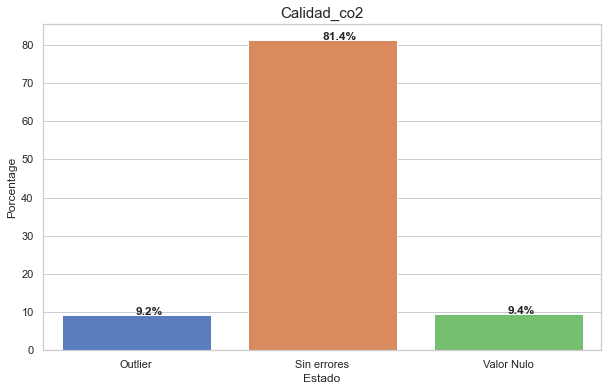

In [207]:
ploteo_Calidad(datosWorld, 'Calidad_co2', '')

In [ ]:
datos.head()

In [94]:
data= datos[datos['Energy_type'] != 'all energy types']

In [95]:
data = data[data['Country'] != 'World']

In [96]:
data.sample(3)

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
35335,35335,Kyrgyzstan,coal,2005,0.023379,0.005263,15.8198,5075.340,38.704418,12.417229,2.340055
10710,10710,Reunion,all_energy_types,1987,0.018208,0.005460,NaN,578.938,31.451466,0.000000,0.800000
4547,4547,Ethiopia,renewables_n_other,1983,0.006554,0.006554,NaN,38142.700,0.996139,0.000000,0.000000


In [97]:
data.isna().sum()

Unnamed: 0                         0
Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64

In [102]:
columnas = data.columns

In [103]:
data

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
6,6,Afghanistan,all_energy_types,1980,0.026583,0.072561,NaN,13356.5,1.990283,0.000000,NaN
7,7,Afghanistan,coal,1980,0.002479,0.002355,NaN,13356.5,1.990283,0.000000,NaN
8,8,Afghanistan,natural_gas,1980,0.002094,0.062820,NaN,13356.5,1.990283,0.000000,NaN
9,9,Afghanistan,petroleum_n_other_liquids,1980,0.014624,0.000000,NaN,13356.5,1.990283,0.000000,NaN
10,10,Afghanistan,nuclear,1980,NaN,NaN,NaN,13356.5,1.990283,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.6204,14654.2,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.6204,14654.2,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.6204,14654.2,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.6204,14654.2,11.508701,4.482962,0.000000


In [98]:
datos = pd.read_csv('D:\emissionsmap\documentation\TablasNormal\Energyco2_Normalizado.csv', sep=',', low_memory=False, encoding='utf-8')

(array([5.1381e+04, 9.4000e+01, 6.9000e+01, 2.2000e+01, 9.0000e+00,
        8.0000e+00, 1.4000e+01, 3.0000e+00, 5.0000e+00, 9.0000e+00]),
 array([-5.13022234e-03,  3.55848873e+03,  7.11698260e+03,  1.06754765e+04,
         1.42339703e+04,  1.77924642e+04,  2.13509580e+04,  2.49094519e+04,
         2.84679458e+04,  3.20264396e+04,  3.55849335e+04]),
 <BarContainer object of 10 artists>)

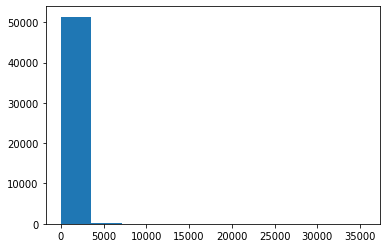

In [101]:
plt.hist(datos['Emisión De Co2'])

(array([25., 20., 10., 20., 20., 20., 20., 20., 20., 25.]),
 array([4298126.5224  , 4639776.976543, 4981427.430686, 5323077.884829,
        5664728.338972, 6006378.793115, 6348029.247258, 6689679.701401,
        7031330.155544, 7372980.609687, 7714631.06383 ]),
 <BarContainer object of 10 artists>)

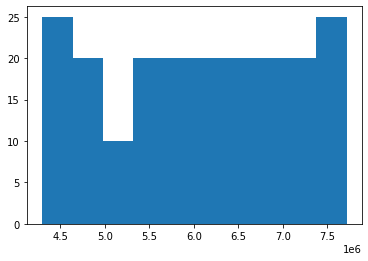

In [58]:
plt.hist(datos['Población'])

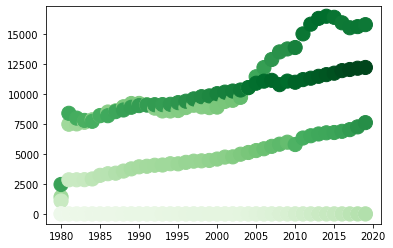

In [60]:
plt.scatter(datos['Año'], datos['Emisión De Co2'], s=200, c=datos['Consumo De Energía'], cmap='Greens')

In [77]:
groups = datos.groupby('Combustible')

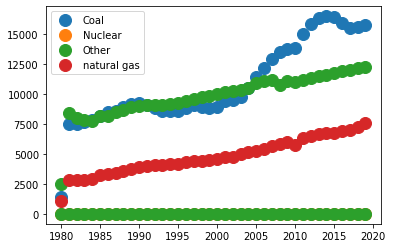

In [78]:

for name, group in groups:
    plt.plot(group['Año'], group['Emisión De Co2'], marker='o', linestyle='', markersize=12, label=name)

plt.legend()